##### 最小二乘法拟合曲线
高斯于1823年在误差$e_1,…,e_n$独立同分布的假定下,证明了最小二乘方法的一个最优性质: 在所有无偏的线性估计类中,最小二乘方法是其中方差最小的！ 对于数据$(x_i, y_i)   (i=1, 2, 3...,m)$
拟合出函数$h(x)$
有误差，即残差：$r_i=h(x_i)-y_i$
此时$L2$范数(残差平方和)最小时，$h(x)$ 和 $y$ 相似度最高，更拟合
一般的$H(x)$为$n$次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$
$w(w_0,w_1,w_2,...,w_n)$为参数
最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ ，使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小
即，求 $min\sum_{i=1}^n(h(x_i)-y_i)^2$

举例：我们用目标函数$y=sin2{\pi}x$, 加上一个正态分布的噪音干扰，用多项式去拟合【例1.1 11页】


In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

- numpy.poly1d([1,2,3]) 生成  $1x^2+2x^1+3x^0$*

In [31]:
# 目标
def real_func(x):
    return np.sin(2*np.pi*x)

# 拟合
def fit_func(p,x):
    f = np.poly1d(p)
    print("f:",f)
    print("f(x):",f(x))
    return f(x)

# 残差
def residuals_func(p, x, y):
    res = fit_func(p, x) - y
    print("res:",res)
    return res


In [32]:
# 生成点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]

def fitting(M=0):
    """
    M    为 多项式的次数
    """
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])
    #p_lsq[0]才是返回拟合的具体参数结果
    print('more(p_lsq):',p_lsq)

    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

##### M = 0

f:  
0.9827
f(x): [0.9826933 0.9826933 0.9826933 0.9826933 0.9826933 0.9826933 0.9826933
 0.9826933 0.9826933 0.9826933]
res: [0.85269347 0.27455703 0.13808963 0.23512385 0.4711315  1.43341958
 1.79890815 2.1119566  1.6416104  0.95971692]
f:  
0.9827
f(x): [0.9826933 0.9826933 0.9826933 0.9826933 0.9826933 0.9826933 0.9826933
 0.9826933 0.9826933 0.9826933]
res: [0.85269347 0.27455703 0.13808963 0.23512385 0.4711315  1.43341958
 1.79890815 2.1119566  1.6416104  0.95971692]
f:  
0.9827
f(x): [0.9826933 0.9826933 0.9826933 0.9826933 0.9826933 0.9826933 0.9826933
 0.9826933 0.9826933 0.9826933]
res: [0.85269347 0.27455703 0.13808963 0.23512385 0.4711315  1.43341958
 1.79890815 2.1119566  1.6416104  0.95971692]
f:  
0.9827
f(x): [0.98269332 0.98269332 0.98269332 0.98269332 0.98269332 0.98269332
 0.98269332 0.98269332 0.98269332 0.98269332]
res: [0.85269349 0.27455705 0.13808965 0.23512386 0.47113152 1.4334196
 1.79890817 2.11195661 1.64161041 0.95971693]
f:  
-0.009027
f(x): [-0.00902741 -

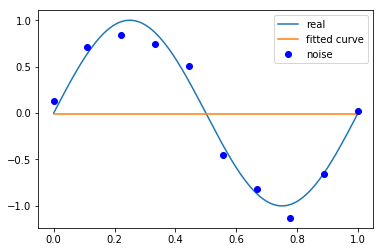

In [33]:
# M=0
p_lsq_0 = fitting(M=0)

##### M = 1

f:  
0.8567 x + 0.4211
f(x): [0.42108487 0.51627435 0.61146383 0.70665332 0.8018428  0.89703228
 0.99222177 1.08741125 1.18260073 1.27779021]
res: [ 0.29108504 -0.19186192 -0.23313984 -0.04091614  0.290281    1.34775856
  1.80843661  2.21667454  1.84151783  1.25481383]
f:  
0.8567 x + 0.4211
f(x): [0.42108487 0.51627435 0.61146383 0.70665332 0.8018428  0.89703228
 0.99222177 1.08741125 1.18260073 1.27779021]
res: [ 0.29108504 -0.19186192 -0.23313984 -0.04091614  0.290281    1.34775856
  1.80843661  2.21667454  1.84151783  1.25481383]
f:  
0.8567 x + 0.4211
f(x): [0.42108487 0.51627435 0.61146383 0.70665332 0.8018428  0.89703228
 0.99222177 1.08741125 1.18260073 1.27779021]
res: [ 0.29108504 -0.19186192 -0.23313984 -0.04091614  0.290281    1.34775856
  1.80843661  2.21667454  1.84151783  1.25481383]
f:  
0.8567 x + 0.4211
f(x): [0.42108487 0.51627435 0.61146384 0.70665332 0.80184281 0.89703229
 0.99222177 1.08741126 1.18260074 1.27779023]
res: [ 0.29108504 -0.19186192 -0.23313983 -0.040

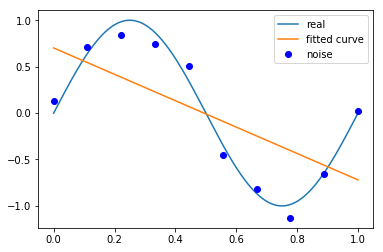

In [34]:
# M=1
p_lsq_1 = fitting(M=1)

##### M=2

res: [ 0.0882972  -0.51122278 -0.9443556  -0.49401185 -0.08260119  0.61518605
  1.3938513   1.63805908  1.16417498  0.71534201]
res: [ 0.0882972  -0.51122278 -0.9443556  -0.49401185 -0.08260119  0.61518605
  1.3938513   1.63805908  1.16417498  0.71534201]
res: [ 0.0882972  -0.51122278 -0.9443556  -0.49401185 -0.08260119  0.61518605
  1.3938513   1.63805908  1.16417498  0.71534201]
res: [ 0.0882972  -0.51122278 -0.9443556  -0.49401185 -0.08260118  0.61518605
  1.3938513   1.63805909  1.16417498  0.71534201]
res: [ 0.0882972  -0.51122278 -0.9443556  -0.49401185 -0.08260118  0.61518606
  1.39385131  1.63805909  1.16417498  0.71534202]
res: [ 0.0882972  -0.51122278 -0.9443556  -0.49401185 -0.08260118  0.61518605
  1.3938513   1.63805908  1.16417498  0.71534201]
res: [ 0.70196177 -0.10133845 -0.74282863 -0.50541935 -0.31152028  0.16417825
  0.71617767  0.7291425   0.01943833 -0.66979182]
res: [ 0.70196177 -0.10133845 -0.74282863 -0.50541935 -0.31152028  0.16417825
  0.71617767  0.72914251  

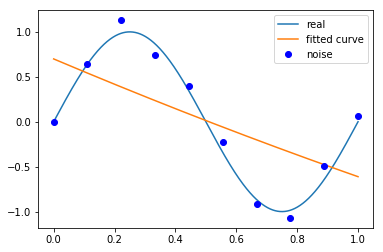

In [30]:
p_lsq_2 = fitting(M=2)

Fitting Parameters: [ 22.67175007 -33.95442574  11.48853536  -0.11559028]
more(p_lsq): (array([ 22.67175007, -33.95442574,  11.48853536,  -0.11559028]), 1)


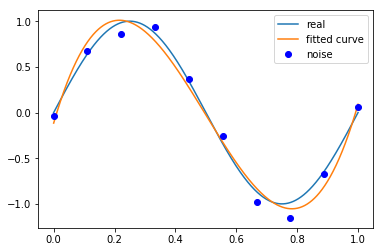

In [16]:
p_lsq_3 = fitting(M=3)

Fitting Parameters: [ -3.14800833  26.41359856 -33.99984836  10.84746235  -0.0498367 ]


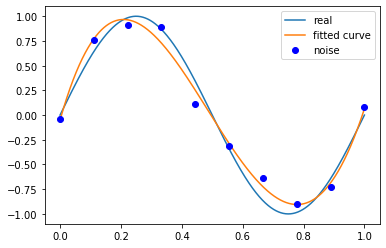

In [48]:
p_lsq_4 = fitting(M=4)

Fitting Parameters: [ 1.28746607e+03 -5.64624783e+03  1.10352614e+04 -1.26286622e+04
  9.08600315e+03 -4.02810326e+03  1.03454791e+03 -1.56580888e+02
  1.64261390e+01 -2.67672779e-02]
more(p_lsq): (array([ 1.28746607e+03, -5.64624783e+03,  1.10352614e+04, -1.26286622e+04,
        9.08600315e+03, -4.02810326e+03,  1.03454791e+03, -1.56580888e+02,
        1.64261390e+01, -2.67672779e-02]), 2)


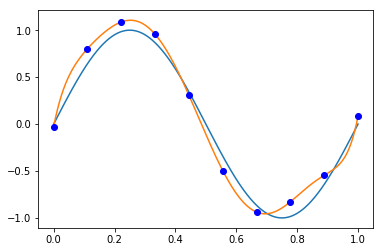

In [19]:
p_lsq_9 = fitting(M=9)


当M=9时，多项式曲线通过了每个数据点，但是造成了过拟合
正则化
结果显示过拟合， 引入正则化项(regularizer)，降低过拟合

$Q(x)=\sum_{i=1}^n(h(x_i)-y_i)^2+\lambda||w||^2$。

回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。
- L1: regularization*abs(p)
- L2: 0.5 * regularization * np.square(p)

In [40]:
regularization = 0.0001

def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    print("ret: ",ret)
    print("L2:",np.sqrt(0.5 * regularization * np.square(p)))
    ret = np.append(ret,
                    np.sqrt(0.5 * regularization * np.square(p)))  # L2范数作为正则化项
    print("ret1: ",ret)
    return ret


In [41]:
# 最小二乘法,加正则化项
p_init = np.random.rand(9 + 1)
p_lsq_regularization = leastsq(
    residuals_func_regularization, p_init, args=(x, y))

f:         9          8          7          6           5          4
0.5959 x + 0.8254 x + 0.8277 x + 0.5825 x + 0.01649 x + 0.6015 x
           3          2
 + 0.9054 x + 0.9805 x + 0.7118 x + 0.8467
f(x): [0.84666562 0.93919178 1.0647677  1.2352308  1.46891893 1.79928284
 2.29350651 3.08829465 4.45299211 6.89376356]
ret:  [0.71666578 0.23105551 0.22016403 0.48766134 0.95735713 2.25000912
 3.10972136 4.21755795 5.11190921 6.87078718]
L2: [0.00421331 0.00583639 0.00585243 0.00411895 0.00011658 0.00425349
 0.00640182 0.00693348 0.00503297 0.00598683]
ret1:  [7.16665783e-01 2.31055509e-01 2.20164032e-01 4.87661341e-01
 9.57357127e-01 2.25000912e+00 3.10972136e+00 4.21755795e+00
 5.11190921e+00 6.87078718e+00 4.21331399e-03 5.83638956e-03
 5.85243235e-03 4.11895418e-03 1.16580847e-04 4.25349370e-03
 6.40181952e-03 6.93348285e-03 5.03297263e-03 5.98682999e-03]
f:         9          8          7          6           5          4
0.5959 x + 0.8254 x + 0.8277 x + 0.5825 x + 0.01649 x + 0.6015

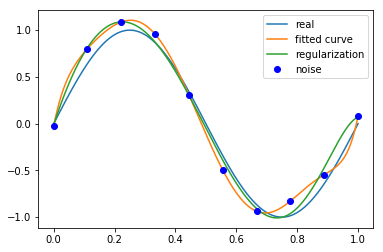

In [22]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(
    x_points,
    fit_func(p_lsq_regularization[0], x_points),
    label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()